In [1]:
# import data
import pandas as pd
data_lcparam = pd.read_csv("lcparam_DS17f.txt", sep=" ")

#import the core functions: 
#chain gives us results
#plot_chain_behaviour shows the results
from core_mcmc_functions import chain
from core_mcmc_functions import plot_chain_behaviour

# 1A :
no systematic error, fixed M

In [3]:
ss = [.96,.2,50,-19.23]
chn, rej, convergence = chain(data_lcparam, 4000, 1500, .003, start_state=ss, gen_variances=None, prior_mode='uniform')

The chain has converged to the values: [  0.3571808    0.84322655  74.64382846 -19.23      ] in 3682 trials


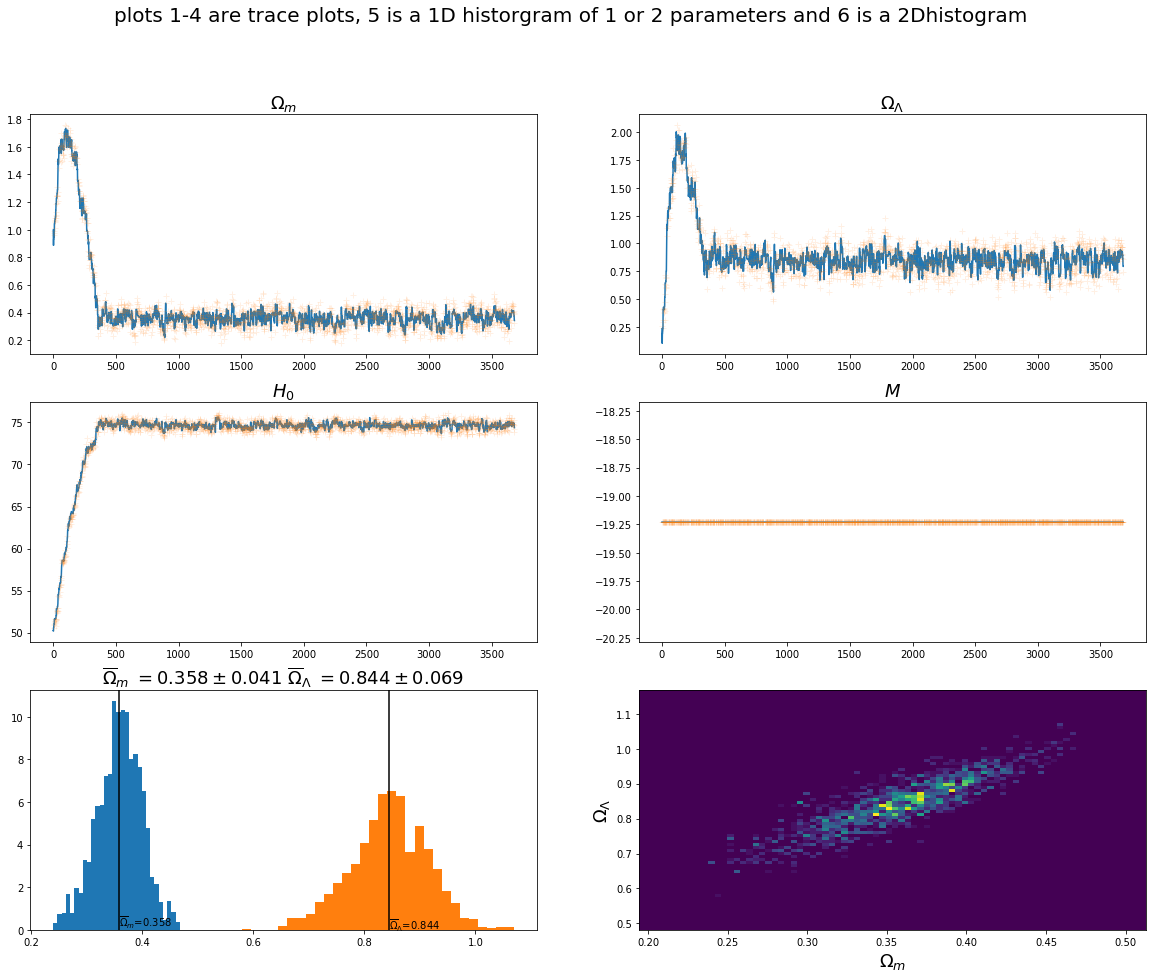

In [4]:
#plot the results:
plot_chain_behaviour(chn, rej)

# 1B :
systematic error, gaussian prior on M

In [5]:
# import systematic error data file
import numpy as np
import pandas as pd
data_sys = pd.read_csv("sys_DS17f.txt", sep=" ")
data_sys.columns = ["sys_error"]
sys_error_data = np.reshape(pd.Series.to_numpy(data_sys.sys_error), (40, 40))

# create a likelihood function that uses the systematic error
# to do this we will make a new function that calls the likelihood function
# using our systematic error data 
from prior_likelihood import likelihood

def sys_error_likelihood(params, data):
    return likelihood(params, data, sys_error=sys_error_data)

In [6]:
# we will start closer to the convergence values here, so it doesnt take too long to run

ss2 = [.3, .65, 70, -17]
kwargs = {'gen_variances' : 'systematic', 'prior_mode' : 'M_gaussian', 'likelihood_func' : sys_error_likelihood}
chn, rej, convergence = chain(data_lcparam, 10000, 2500, .005, start_state=ss2, **kwargs) 
                              
                              
                              

convergence failed. converged parameters: [False False  True  True]


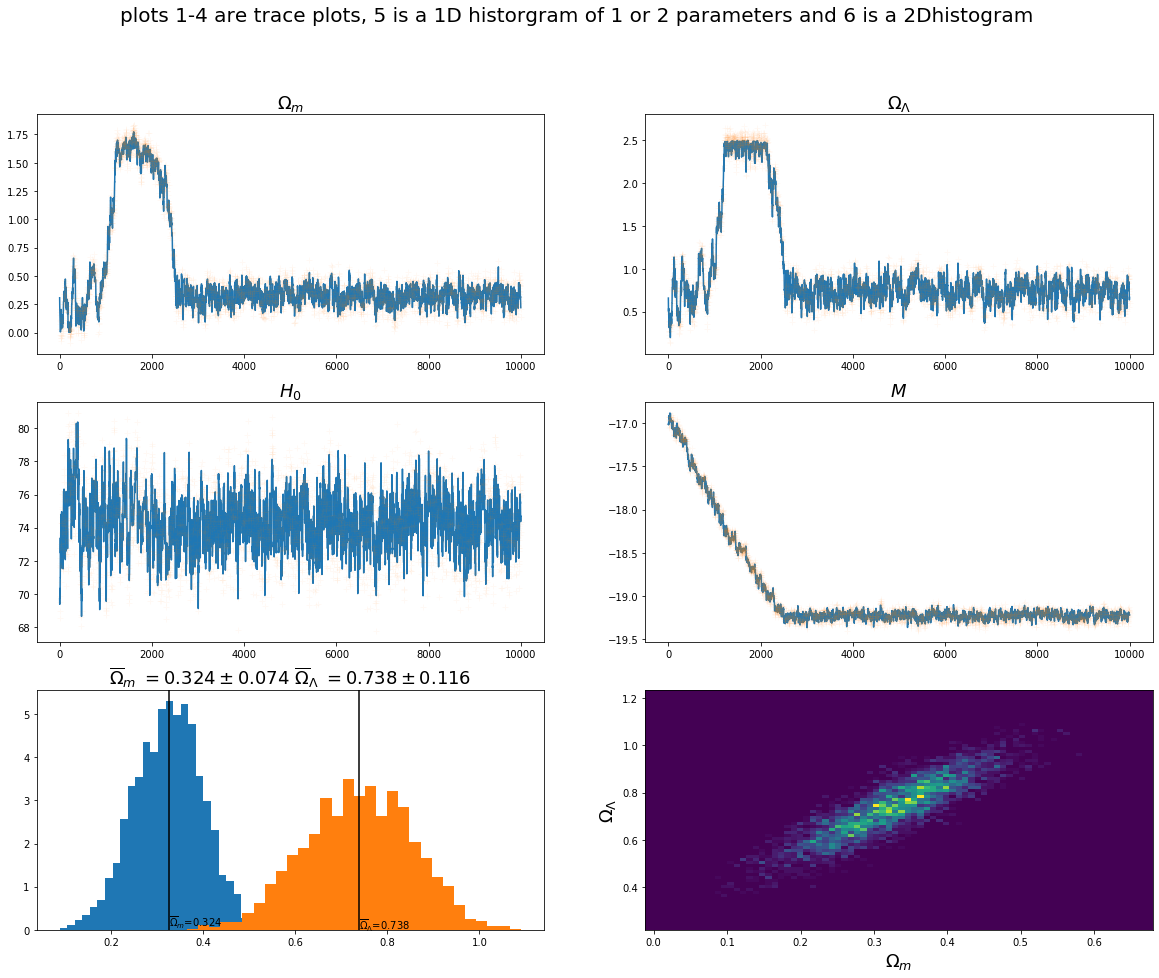

In [7]:
#plot the results:
plot_chain_behaviour(chn, rej)

# 2
posterior distribution over H_0

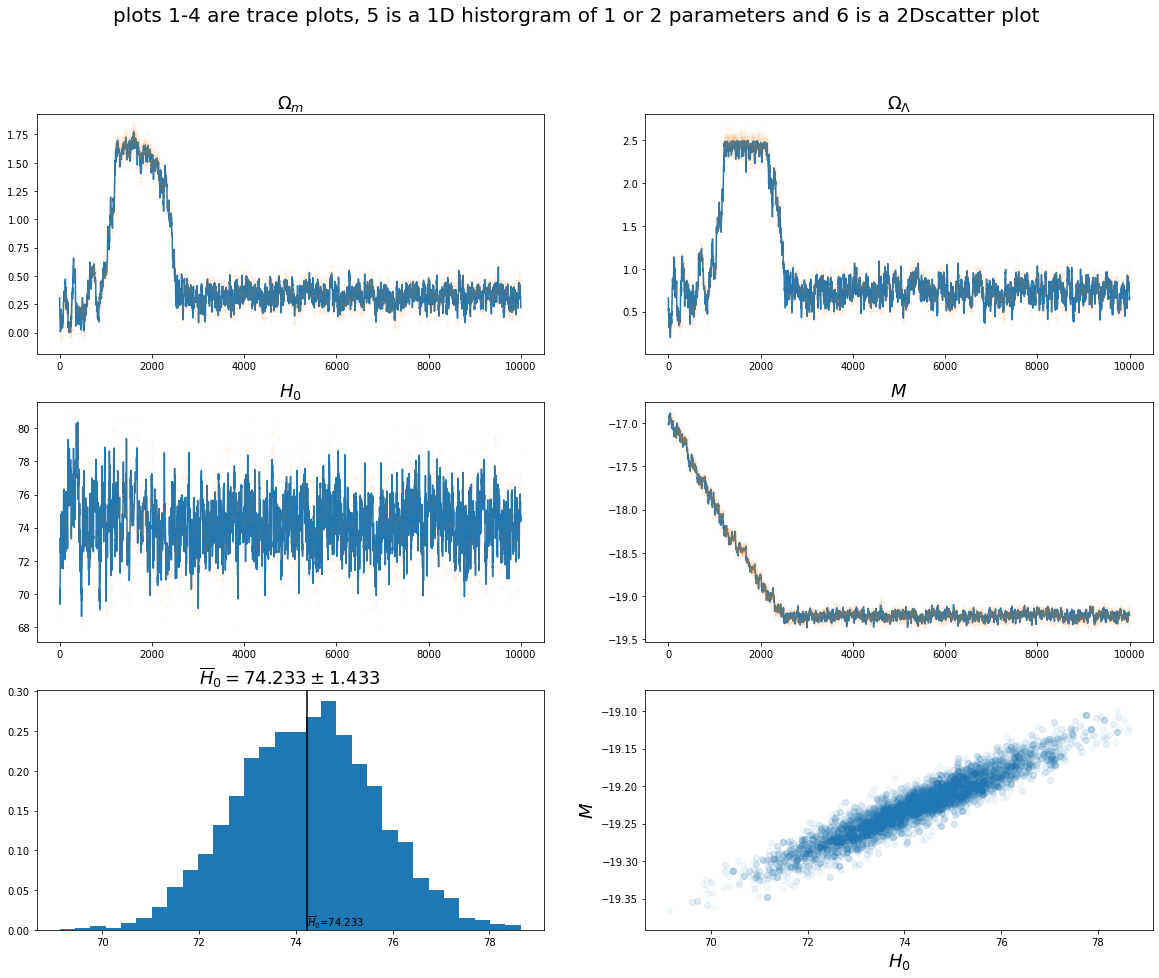

In [12]:
# all we need to do is change our plotting parameters so we get a histogram over just H_0
# the posterior will be in the 5th plot
# just for fun, lets play with some other options too : make the last plot a scatter plot of M and H_0
plot_chain_behaviour(chn, rej, one_d_hist_1=2, one_d_hist_2=None, two_d_hist_1 =2, two_d_hist_2=3, two_d_histogram=False)

# Testing
here are our testing functions, check the doctstrings for more info

In [1]:
from test_function import*

In [14]:
test_mag_func_omegaK_is_0()
test_mag_func_omegaK_is_neg()
test_mag_func_omegaK_is_pos()

output of the magnitude function is correct
output of the magnitude function is correct
output of the magnitude function is correct


In [4]:
likelihood_test_fake_data()

Likelihood function works well on the fake data.


In [5]:
mcmc_lambda_cdm_test()

The chain has converged to the values: [  0.28207327  74.3101596  -19.23      ] in 3094 trials
mcmc chain works perfectly for the lambda cdm model


Signature: mcmc_lambda_cdm_test()
Docstring: <no docstring>
File:      ~/Documents/UCD/Misc_Classes/Data_Science/DS4S_group01_SNproject/test_function.py
Type:      function


In [3]:
chain_test()

The chain has converged to the values: [  0.38652449   0.82        74.         -19.23      ] in 801 trials
no problems detected


In [4]:
metropolis_test()

'its an old code, but it checks out'

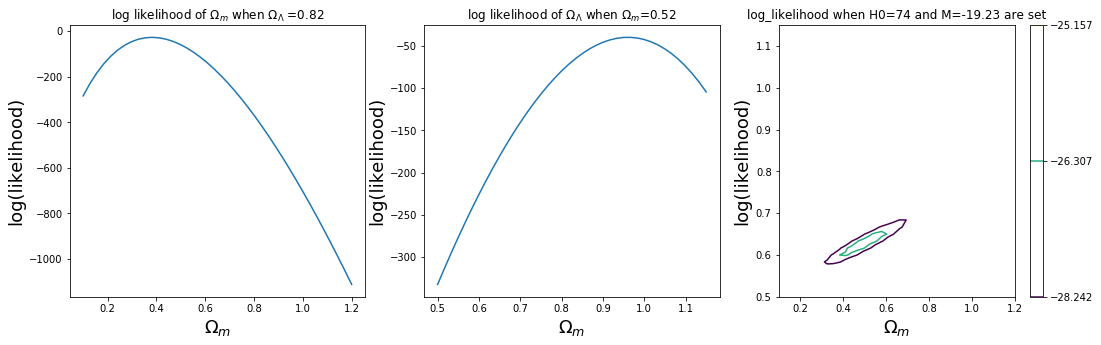

In [3]:
# this test is a little different, it mqkes a plot of the log_likelihood by brute force.
# helpful if you are worried about a false negative/positive on the other likelihood test
# does not involve an assert
likelihood_test(40)